## Load Dataset & Explore Data

In [1]:
import pandas as pd

data_file = 'data/data.csv'
df = pd.read_csv(data_file)
df.head()

,id,source,title,image,url,content,date,embedding,created_at,updated_at,summary
0,83,tempo,"Depo Plumpang Terbakar, Anggota DPR Minta Pert...",https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698528/depo-pl...,"TEMPO.CO, Jakarta - Anggota Komisi VII DPR RI ...",2023-03-04 06:18:13+00,"[-0.01590039,-0.034130897,0.005732614,-0.01853...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Anggota Komisi VII DPR RI Rofik Hananto menyay...
1,84,tempo,Jokowi Perintahkan Wapres Ma'ruf Amin Tinjau L...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698522/jokowi-...,"TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...",2023-03-04 06:04:38+00,"[-0.017608976,-0.021786924,0.01547983,-0.00932...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Presiden Joko Widodo telah memerintahkan Wakil...
2,85,tempo,HNW Mendukung Jamaah Umroh First Travel Dapatk...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698527/hnw-men...,INFO NASIONAL - Wakil Ketua MPR RI Dr. H. M. H...,2023-03-04 06:18:04+00,"[0.00841488,-0.023665192,0.006762431,-0.013723...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Wakil Ketua MPR RI Dr. H. M. Hidayat Nur Wahid...
3,86,tempo,Tim Dokkes Polri Telah Terima 14 Kantong Jenaz...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698540/tim-dok...,"TEMPO.CO, Jakarta - Tim Kedokteran dan Kesehat...",2023-03-04 06:44:10+00,"[-0.012671886,-0.0039057182,0.019575326,-0.016...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Tim Kedokteran dan Kesehatan (Dokkes) Polri te...
4,87,tempo,Bamsoet Ajak Komunitas Otomotif Kembangkan Per...,https://statik.tempo.co/data/2023/03/04/id_118...,https://nasional.tempo.co/read/1698536/bamsoet...,INFO NASIONAL - Ketua MPR RI sekaligus Ketua U...,2023-03-04 06:38:57+00,"[-0.015486176,-0.0125719,-0.0122843925,-0.0343...",2023-03-04 07:03:39.039332,2023-03-04 07:03:39.039332,Ketua MPR RI Bambang Soesatyo telah diangkat s...


In [2]:
# Cek nullable
df.isnull().sum()

id              0
source          0
title           0
image         160
url             0
content       441
date            0
embedding       0
created_at      0
updated_at      0
summary        10
dtype: int64

In [3]:
# Data imputation
df = df.fillna('')

# Cek nullable
df.isnull().sum()

id            0
source        0
title         0
image         0
url           0
content       0
date          0
embedding     0
created_at    0
updated_at    0
summary       0
dtype: int64

In [4]:
# Cek jumlah kata dalam setiap fitur
df['title_word_count'] = df['title'].apply(lambda x: len(str(x).split()))
df['content_word_count'] = df['content'].apply(lambda x: len(str(x).split()))
df['summary_word_count'] = df['summary'].apply(lambda x: len(str(x).split()))

df[['title_word_count', 'content_word_count', 'summary_word_count']].describe()

,title_word_count,content_word_count,summary_word_count
count,32735.000000,32735.000000,32735.000000
mean,10.260822,314.776661,61.685138
std,2.258505,166.507478,15.165164
min,2.000000,0.000000,0.000000
25%,9.000000,212.000000,51.000000
50%,10.000000,288.000000,62.000000
75%,12.000000,385.000000,72.000000
max,22.000000,1895.000000,139.000000


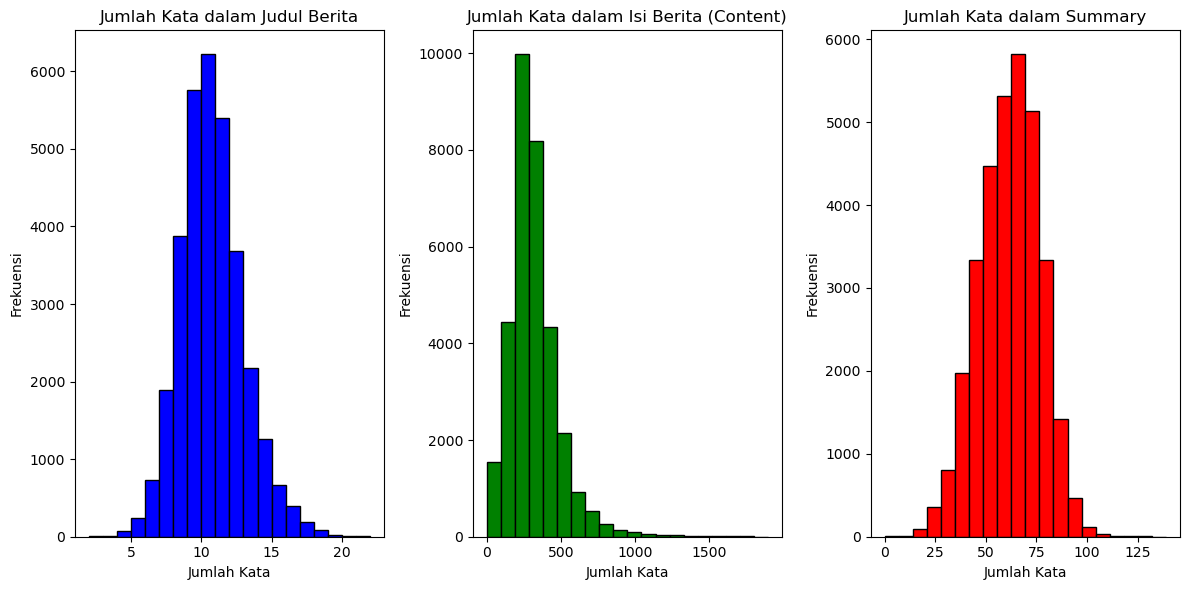

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualisasi histogram
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(df['title_word_count'], bins=20, color='blue', edgecolor='black')
plt.title('Jumlah Kata dalam Judul Berita')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 2)
plt.hist(df['content_word_count'], bins=20, color='green', edgecolor='black')
plt.title('Jumlah Kata dalam Isi Berita (Content)')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 3)
plt.hist(df['summary_word_count'], bins=20, color='red', edgecolor='black')
plt.title('Jumlah Kata dalam Summary')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Dengan melakukan eksplorasi data dan pembersihan data dapat disimpulkan bahwa
- Terdapat 32.735 berita dalam dataset ini.
- Rata-rata terdapat judul dengan panjang 10 kata.
- Rata-rata isi berita memiliki panjang 314 kata.
- Rata-rata ringkasan berita terdiri dari 61 kata.

## Preprocessing Text

In [6]:
# Pilih fitur yang merepresentasikan judul dan isi berita saja
news_data = df[['content']]

news_data.head()

,content
0,"TEMPO.CO, Jakarta - Anggota Komisi VII DPR RI ..."
1,"TEMPO.CO, Jakarta - Presiden Joko Widodo atau ..."
2,INFO NASIONAL - Wakil Ketua MPR RI Dr. H. M. H...
3,"TEMPO.CO, Jakarta - Tim Kedokteran dan Kesehat..."
4,INFO NASIONAL - Ketua MPR RI sekaligus Ketua U...


In [7]:
# Case-folding (lowercase) dan stop words removal
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

news_data['cleaned_text'] = news_data['content'].apply(preprocess_text)

news_data['cleaned_text'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hafid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\hafid\AppData\Local\Temp\ipykernel_12760\465187285.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['cleaned_text'] = news_data['content'].apply(preprocess_text)


0    tempo.co, jakarta - anggota komisi vii dpr ri ...
1    tempo.co, jakarta - presiden joko widodo jokow...
2    info nasional - wakil ketua mpr ri dr. h. m. h...
3    tempo.co, jakarta - tim kedokteran kesehatan (...
4    info nasional - ketua mpr ri ketua ikatan moto...
Name: cleaned_text, dtype: object

In [8]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(news_data['cleaned_text'])

## Modeling

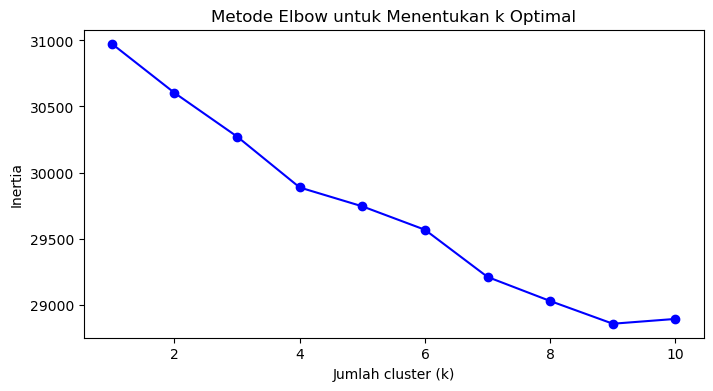

In [9]:
# Menentukan jumlah cluster optimal menggunakan metode Elbow
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot metode Elbow
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.show()

In [11]:
# Clustering dengan K-Means
from sklearn.cluster import KMeans

num_clusters = 9
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
news_data['cluster'] = kmeans.fit_predict(X)


C:\Users\hafid\AppData\Local\Temp\ipykernel_12760\1875915743.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['cluster'] = kmeans.fit_predict(X)


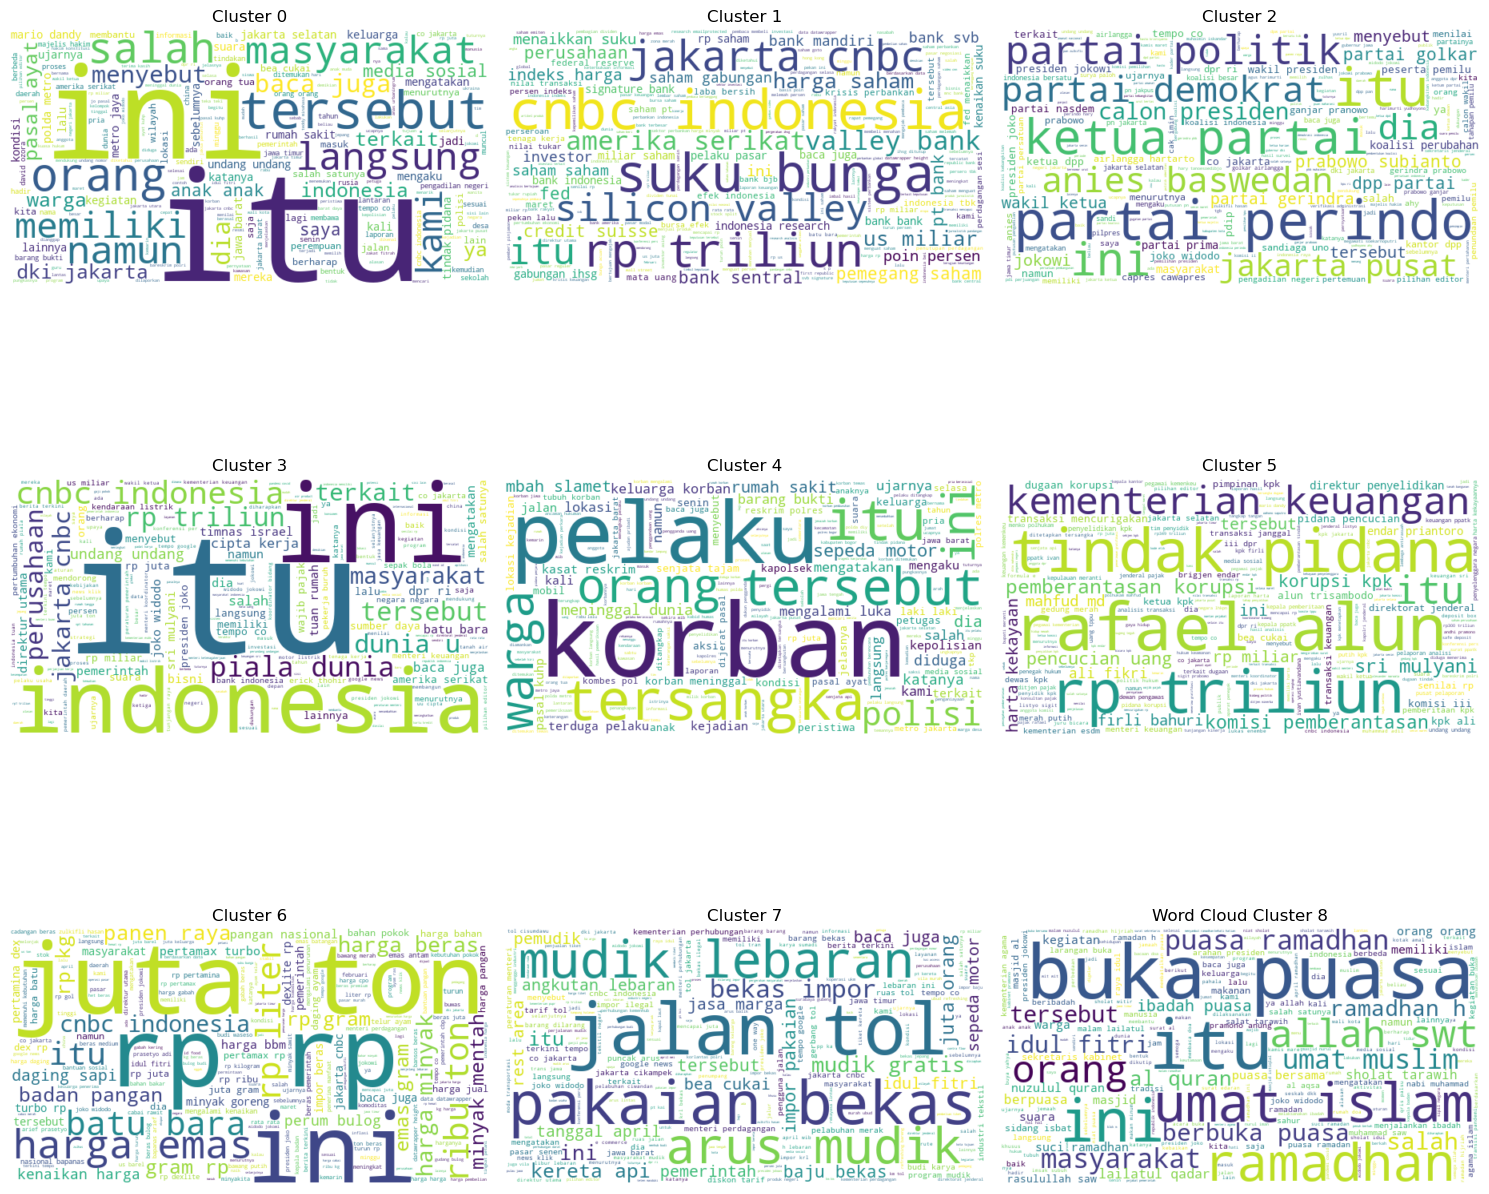

In [ ]:
# Visualisasi Word Cloud untuk setiap cluster
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for cluster in range(num_clusters):
    cluster_text = ' '.join(news_data[news_data['cluster'] == cluster]['cleaned_text'])
    wordcloud = WordCloud(width=600, height=320, background_color='white').generate(cluster_text)

    ax = axes[cluster]
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Cluster {cluster}')

# Hapus subplot yang tidak terpakai
for i in range(num_clusters, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()